In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
col_name = ['Sample Code Number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitosses', 'Class' ]
df =  pd.read_csv('breast-cancer-wisconsin.data', sep=",", names=col_name) #Parameter Header berfungsi untuk melindungi data yang tidak ada headernya, agar data teratas tidak dianggap sebagai header
data = pd.DataFrame(df)
print(data)

     Sample Code Number  Clump Thickness  ...  Mitosses  Class
0               1000025                5  ...         1      2
1               1002945                5  ...         1      2
2               1015425                3  ...         1      2
3               1016277                6  ...         1      2
4               1017023                4  ...         1      2
..                  ...              ...  ...       ...    ...
694              776715                3  ...         1      2
695              841769                2  ...         1      2
696              888820                5  ...         2      4
697              897471                4  ...         1      4
698              897471                4  ...         1      4

[699 rows x 11 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample Code Number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitosses                     699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
data.head()

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
data['Class'] = data['Class'].apply(str)
data.dtypes

Sample Code Number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitosses                        int64
Class                          object
dtype: object

In [ ]:
data['Class'].replace('2', 'Benign', inplace=True)
data['Class'].replace('4', 'Malignant', inplace=True)
print(data)

     Sample Code Number  Clump Thickness  ...  Mitosses      Class
0               1000025                5  ...         1     Benign
1               1002945                5  ...         1     Benign
2               1015425                3  ...         1     Benign
3               1016277                6  ...         1     Benign
4               1017023                4  ...         1     Benign
..                  ...              ...  ...       ...        ...
694              776715                3  ...         1     Benign
695              841769                2  ...         1     Benign
696              888820                5  ...         2  Malignant
697              897471                4  ...         1  Malignant
698              897471                4  ...         1  Malignant

[699 rows x 11 columns]


In [ ]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitosses                       0
Class                          0
dtype: int64

In [ ]:
data = data.drop(columns=['Sample Code Number'], axis=0)

In [ ]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosses,Class
0,5,1,1,1,2,1,3,1,1,Benign
1,5,4,4,5,7,10,3,2,1,Benign
2,3,1,1,1,2,2,3,1,1,Benign
3,6,8,8,1,3,4,3,7,1,Benign
4,4,1,1,3,2,1,3,1,1,Benign


Text(0.5, 1.0, 'General Statistics of Dataset Breast Cancer Wisconsin')

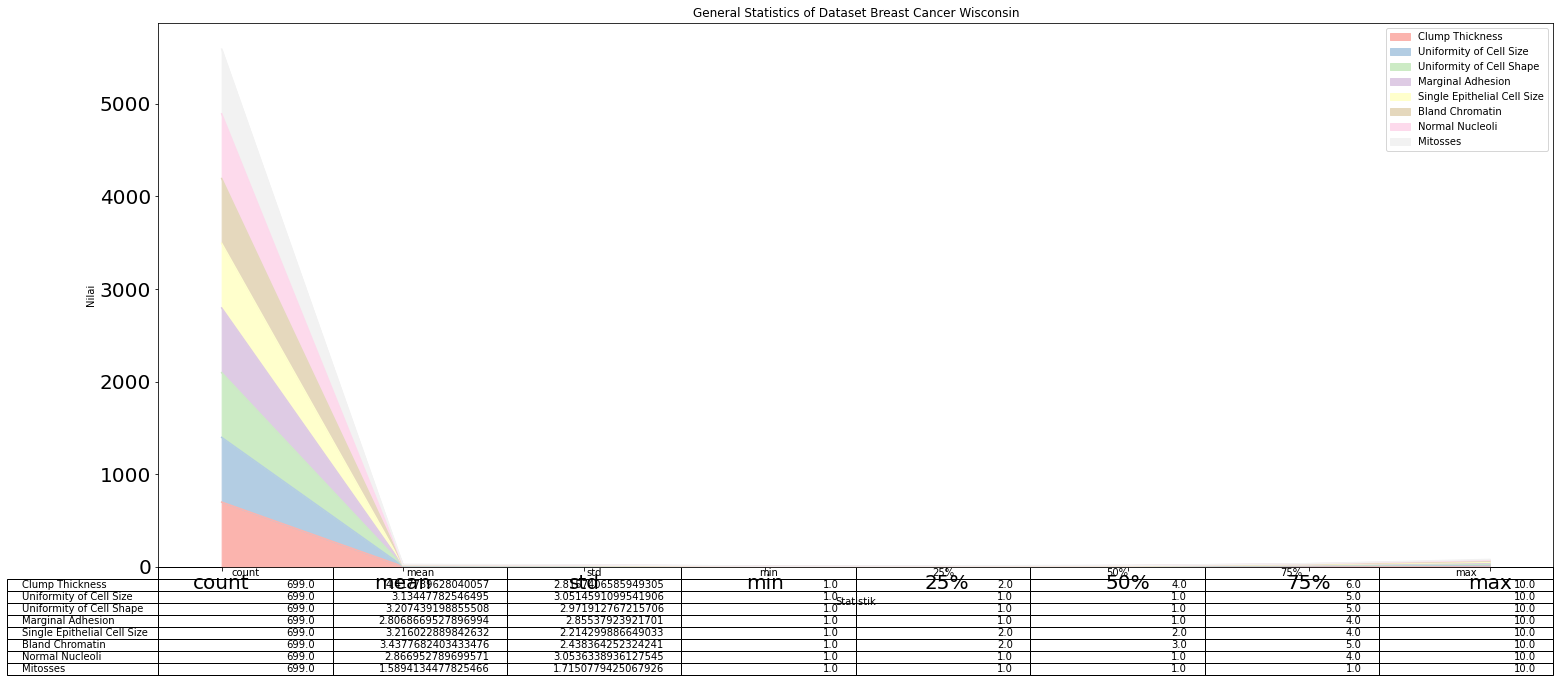

In [ ]:
data.describe().plot(kind = "area",fontsize=20, figsize = (25,10), table = True,colormap="Pastel1")
plt.xlabel('Statistik')
plt.ylabel('Nilai')
plt.title("General Statistics of Dataset Breast Cancer Wisconsin")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


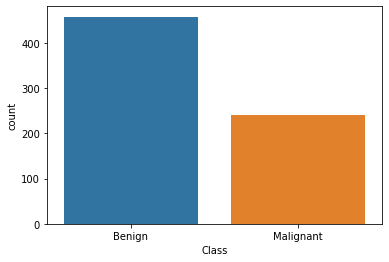

In [ ]:
sns.countplot ('Class', data=data)
plt.show()

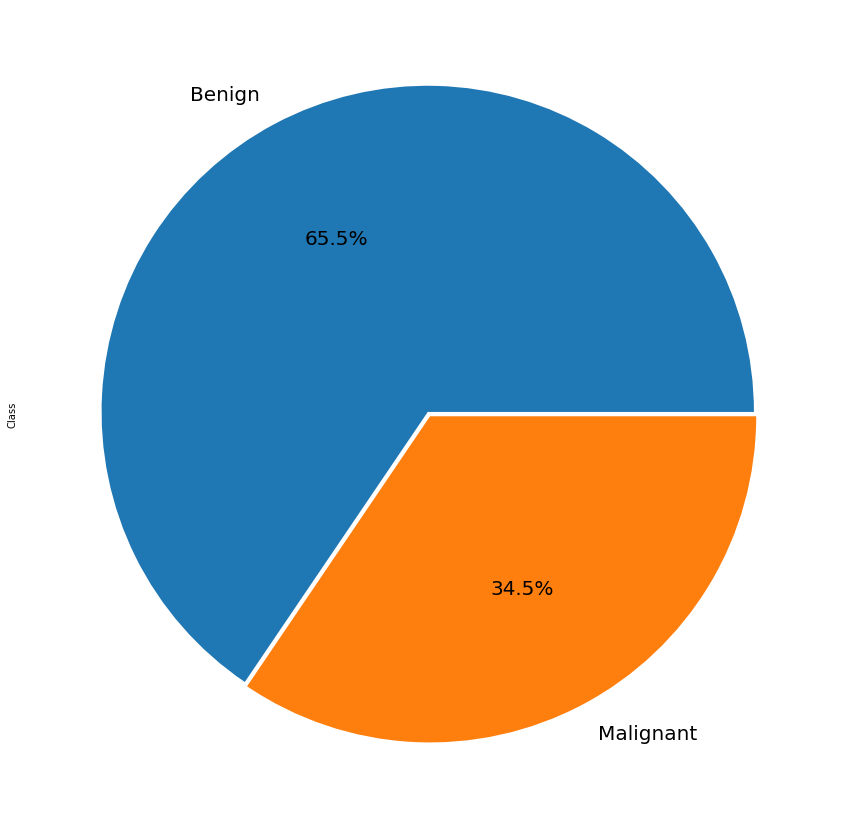

In [ ]:
data['Class'].value_counts().plot.pie(fontsize= 20, explode=[0.0075,0.0075], autopct='%1.1f%%', figsize=(20,15))
plt.show()

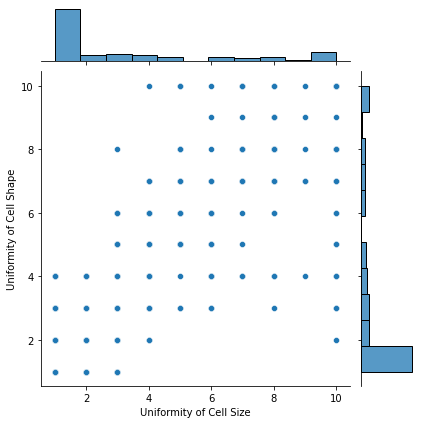

In [ ]:
fig=sns.jointplot(x='Uniformity of Cell Size', y='Uniformity of Cell Shape', data=data)

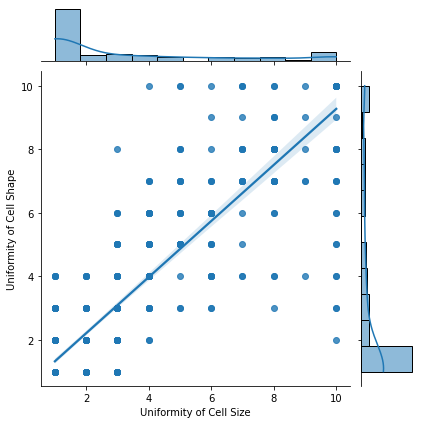

In [ ]:
fig2=sns.jointplot(x='Uniformity of Cell Size', y='Uniformity of Cell Shape', data=data, kind="reg")

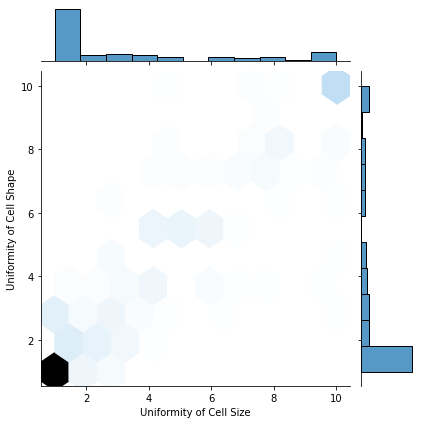

In [ ]:
fig3=sns.jointplot(x='Uniformity of Cell Size', y='Uniformity of Cell Shape', data=data, kind="hex")

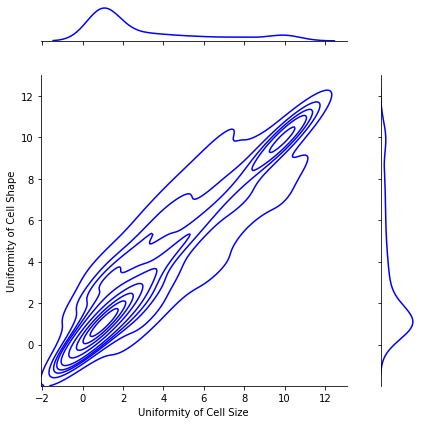

In [ ]:
sns.jointplot(x='Uniformity of Cell Size', y='Uniformity of Cell Shape', data=data, kind="kde", space=1, color='b')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


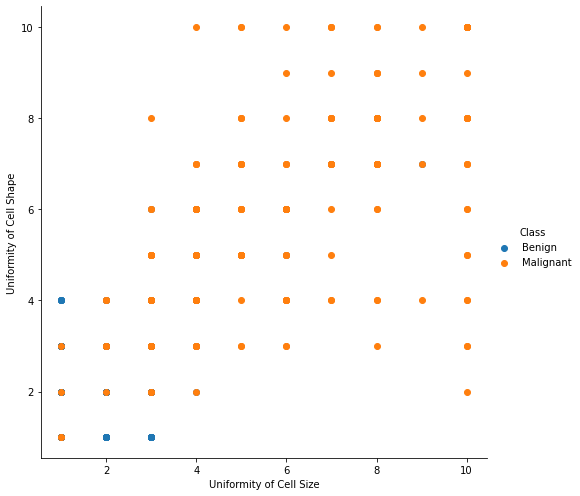

In [ ]:
%matplotlib inline
sns.FacetGrid(data, hue='Class', size=7)\
              .map(plt.scatter, 'Uniformity of Cell Size', 'Uniformity of Cell Shape')\
              .add_legend()